In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans

In [6]:
# 1. Load the image
image = cv2.imread(r'C:\Users\Priyamvadha Pradeep\Desktop\Image Lab\New_Q3\image.jpg', cv2.IMREAD_GRAYSCALE)

In [7]:
# 2. Compute the LBP features
# Parameters for LBP
radius = 5
n_points = 8 * radius

In [8]:
# Compute LBP
lbp_image = local_binary_pattern(image, n_points, radius, method="uniform")

# Normalize LBP image to 0-255
lbp_image_normalized = np.uint8(255 * (lbp_image - lbp_image.min()) / (lbp_image.max() - lbp_image.min()))

In [9]:
# 3. Flatten the LBP features for clustering
height, width = lbp_image.shape
lbp_flat = lbp_image_normalized.reshape(-1, 1)

In [10]:
# 4. Classify pixels into regions using K-Means
num_clusters = 4  # Define the number of texture regions
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(lbp_flat)

In [11]:
# Reshape labels to the image shape
segmented_image = labels.reshape(height, width)

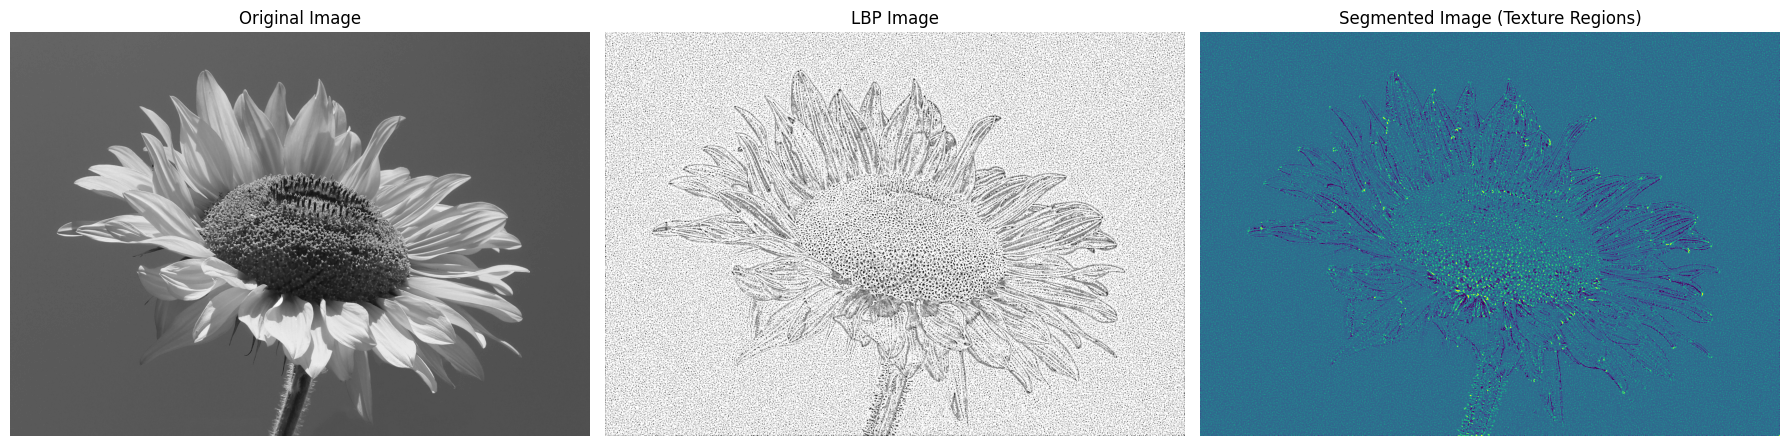

In [12]:
# 5. Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original Image
axs[0].imshow(image, cmap="gray")
axs[0].set_title("Original Image")
axs[0].axis("off")

# LBP Image
axs[1].imshow(lbp_image_normalized, cmap="gray")
axs[1].set_title("LBP Image")
axs[1].axis("off")

# Segmented Image
axs[2].imshow(segmented_image, cmap="viridis")
axs[2].set_title("Segmented Image (Texture Regions)")
axs[2].axis("off")

plt.tight_layout()
plt.show()